In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data/salcap_and_salary.csv')
df.drop(columns = ['Lg', 'season_start', 'season_end', 'Tm'], inplace=True)
df = df.sort_values('player_id').dropna(subset=['clean_Salary'])
number_of_rows=float(len(df))

In [14]:
number_of_complete_rows=float(len(df))
number_of_rows_lost=float(number_of_rows - number_of_complete_rows)

print('Number of Rows', number_of_rows)
print('Number of Complete Rows', number_of_complete_rows)
print('Number of Rows loss', number_of_rows_lost)
print('Precentage lost', float(number_of_rows_lost/ number_of_rows))

Number of Rows 9940.0
Number of Complete Rows 9940.0
Number of Rows loss 0.0
Precentage lost 0.0


In [134]:
df.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,clean_Salary,Salary Cap,%_of_cap
count,9940.000000,9940.000000,9940.000000,9935.000000,9907.000000,9904.000000,9904.000000,9935.000000,9935.000000,9935.000000,...,9940.000000,9935.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000,9.940000e+03,9.940000e+03,9940.000000
mean,26.902113,51.997988,1246.848189,12.858842,0.509809,0.211553,0.306577,5.841047,14.330156,10.085727,...,2.695724,0.074223,-1.481861,-0.368149,-1.849668,0.662797,2006.329276,3.923610e+06,5.211988e+07,0.077371
std,4.321655,25.262414,911.232383,6.025598,0.089998,0.202942,0.218281,4.531477,6.372153,4.847519,...,3.050682,0.095118,3.673399,2.132518,4.477900,1.398372,6.583458,4.577941e+06,1.903279e+07,0.085435
min,18.000000,1.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.100000,-2.519000,-73.800000,-19.200000,-86.700000,-2.600000,1995.000000,5.145000e+03,2.300000e+07,0.000055
25%,24.000000,31.000000,415.000000,10.000000,0.479000,0.009000,0.189000,2.300000,9.700000,6.200000,...,0.300000,0.039000,-3.100000,-1.600000,-3.700000,-0.100000,2001.000000,9.377100e+05,4.027100e+07,0.018192
50%,26.000000,58.000000,1143.000000,13.000000,0.521000,0.182000,0.276000,4.600000,13.400000,9.200000,...,1.700000,0.083000,-1.200000,-0.400000,-1.400000,0.100000,2006.000000,2.178050e+06,5.313500e+07,0.046516
75%,30.000000,75.000000,1974.000000,16.000000,0.555000,0.364000,0.381000,8.800000,18.300000,13.500000,...,4.100000,0.122000,0.500000,0.900000,0.700000,1.100000,2012.000000,5.048500e+06,5.867900e+07,0.107677
max,43.000000,82.000000,3485.000000,88.300000,1.094000,1.000000,6.000000,100.000000,100.000000,86.400000,...,20.400000,0.873000,31.900000,17.100000,34.100000,12.400000,2017.000000,3.468255e+07,9.909300e+07,1.237122


,Pos,%_of_cap
2,PG,0.066726
4,SG,0.073389
3,SF,0.074338
1,PF,0.084193
0,C,0.087010


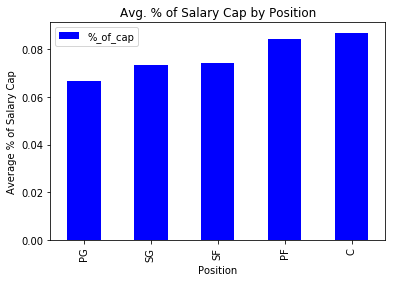

In [24]:
group_by_pos=df.groupby('Pos')
pos_avg_perc_salary=group_by_pos['%_of_cap'].mean().reset_index()

display(pos_avg_perc_salary.sort_values('%_of_cap', ascending=True))
_ = pos_avg_perc_salary.sort_values('%_of_cap', ascending=True).plot(x='Pos', y='%_of_cap', kind='bar',color='b')
_ = plt.ylabel('Average % of Salary Cap')
_ = plt.xlabel('Position')
_ = plt.title('Avg. % of Salary Cap by Position')
plt.show()

On average, it seems that Centers and Power Forwards take up a high percentage of the salary cap.

The dataset will be reduced to only look at columns that can be quantified. 

- Year and Salary will be removed as a determing factor since the salaries have been normalized.  

- Convert Positions from string to an integer that the position in commonly referred to: PG=1, SG=2, SF=3, PF=4,    C=5.

- Removed the Player Names, Player Ids, Team, Season as I felt that these did not add value to the analysis.

In [179]:
df_new = df[['%_of_cap', 'Pos', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 
             'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','WS', 'BPM']]

#Rename Positions to Integer values
df_new = df_new.replace(['PG','SG','SF','PF','C'], range(1,6))

          %_of_cap   Pos   Age     G    MP   PER   TS%  3PAr   FTr  TRB%  \
%_of_cap      1.00  0.09  0.28  0.28  0.49  0.41  0.19 -0.09  0.06  0.12   
Pos           0.09  1.00  0.02 -0.02 -0.08  0.03  0.06 -0.52  0.23  0.74   
Age           0.28  0.02  1.00  0.01  0.02 -0.02  0.02  0.07 -0.07 -0.04   
G             0.28 -0.02  0.01  1.00  0.85  0.41  0.37  0.02 -0.03  0.02   
MP            0.49 -0.08  0.02  0.85  1.00  0.52  0.36  0.04 -0.01 -0.01   
PER           0.41  0.03 -0.02  0.41  0.52  1.00  0.71 -0.12  0.18  0.26   
TS%           0.19  0.06  0.02  0.37  0.36  0.71  1.00  0.02  0.20  0.11   
3PAr         -0.09 -0.52  0.07  0.02  0.04 -0.12  0.02  1.00 -0.33 -0.56   
FTr           0.06  0.23 -0.07 -0.03 -0.01  0.18  0.20 -0.33  1.00  0.29   
TRB%          0.12  0.74 -0.04  0.02 -0.01  0.26  0.11 -0.56  0.29  1.00   
AST%          0.20 -0.66  0.05  0.14  0.28  0.29  0.05  0.22 -0.11 -0.44   
STL%         -0.00 -0.29 -0.03  0.04  0.07  0.19 -0.01  0.09 -0.02 -0.17   
BLK%        

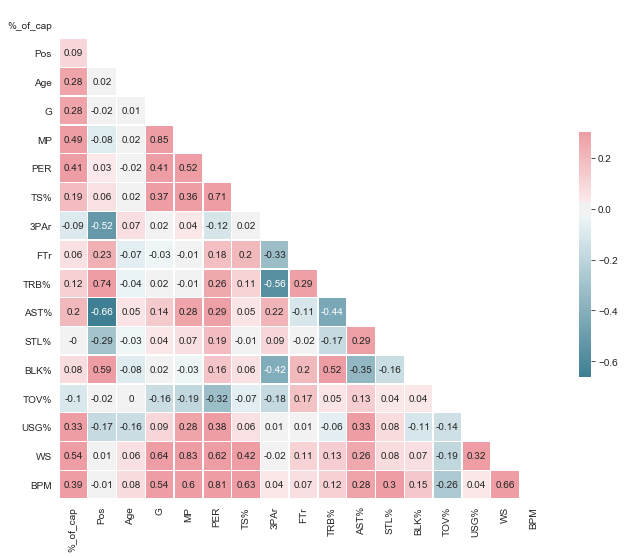

In [200]:
#Correlation values for heatmap
corr = df_new.corr().round(2)

print(corr)
#Mask to to create a diagonal heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation Strength for % of Salary Cap
- Moderate Positive Correlation (0.3 to 0.7): Minutes Played, Player Efficiency Rating, Usage %, Win Shares, Box Plus/Minus 
- Weak Positive and Negative Correlation (0 to 0.3) (0 to -0.3): Position, Age, Games Played, True Shooting %, 3-Point Attempt Rate, Free Throw Rate, Total Rebounding %, Assist %, Steal %, Block %, Turnover %



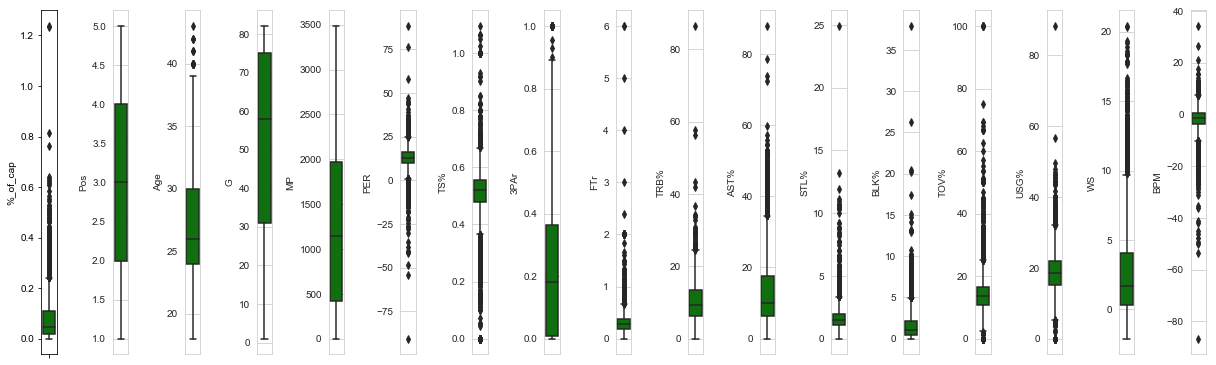

In [191]:
l = df_new.columns.values
number_of_columns=17
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_new[l[i]],color='green',orient='v')
    plt.tight_layout()

Position, Games Played, Minuted Played are the only variables that do not have outliers.

The outlier for % of salary cap goes to Michael Jordan during the 96/97 and 97/98 NBA Season. During this year there was no maximum salary cap for players. He was making more than the salary cap allowed.

In [202]:
out = df[df['%_of_cap']>1]
out[['Player', 'Team', 'Season','Salary', 'Salary Cap', '%_of_cap']]

,Player,Team,Season,Salary,Salary Cap,%_of_cap
949,Michael Jordan*,Chicago Bulls,1997-98,33140000,26900000,1.231970
548,Michael Jordan*,Chicago Bulls,1996-97,30140000,24363000,1.237122


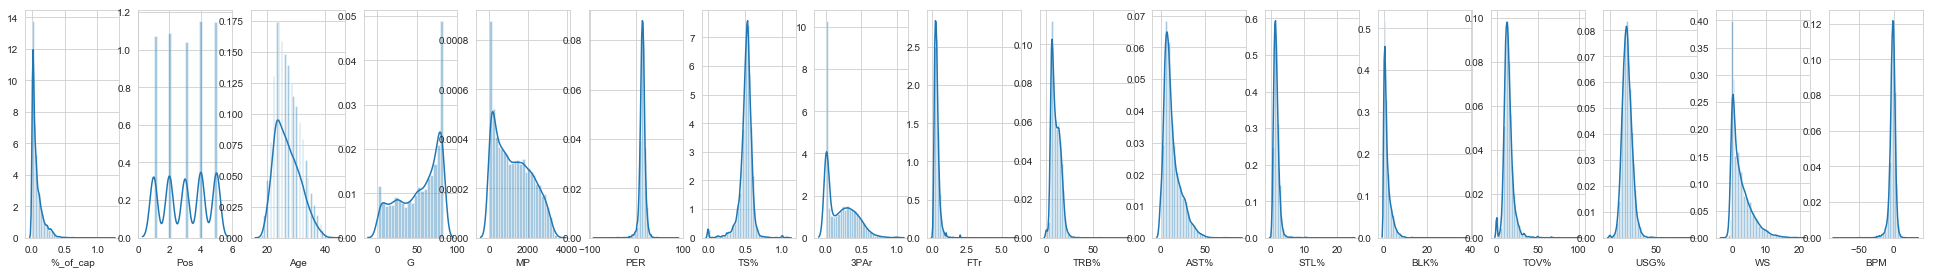

In [194]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_new[l[i]].dropna(),kde=True) 

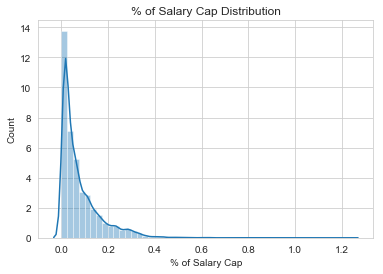

In [199]:
#Closer look at % of Cap
_ = sns.distplot(df_new['%_of_cap'])
_ = plt.ylabel('Count')
_ = plt.xlabel('% of Salary Cap')
_ = plt.title('% of Salary Cap Distribution')
plt.show()

% of salary cap is skewed to the right. This makes sense as nothing will go below 0. 